`CMPE-255. Fall 2023`

**Submitted By** : Darshini Venkatesha Murthy Nag <br/>
**SJSU ID** : 016668951 <br/>


# Beating the Market
After taking a Data Mining class, Suzie Happybetting decided that she could use Association Rules to beat the stock market. Armed with the knowledge of data cleaning, data sampling, and association analysis, she devised an algorithm to pick the right companies to invest in. Her strategy will be to identify groups of companies that increase value over periods of 6 months, calculate the confidence that this groups grow together, then bet in the companies in a high confidence rule before their stock goes up. For instance, if she finds out that `{ AMD, APPL, NVDA }` have high support, and `{ AMD, APPL } > { NVDA }` has high confidence, she can invest in NVDA as soon as the stock for AMD, APPL go up, because she'll expect the stock from NVDA will quickly follow.

In [1]:
# Libraries - ONLY THIS LIBRARIES ARE ALLOWED FOR THE HOMEWORK
import random
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import progressbar
# Do not add any other library

In [2]:
# Stock tickers. Small is best for debuging the code. Medium or Large should be used for final solution.
TICKERS_SMALL = ['AMD', 'AAPL', 'MA', 'MRK', 'NVDA', 'PPIH', 'GLO', 'AGM']
TICKERS_MEDIUM = TICKERS_SMALL + ['HGBL', 'ETO', 'INFY', 'SNBR', 'CENTA', 'CWT', 'TRTN', 'SKX',
 'FSS', 'TPR', 'ONB', 'SBH', 'MDT', 'SENEB', 'HSBC', 'STN', 'JOB', 'TYG', 'TENX', 'TRN', 'CTHR']
TICKERS_LARGE  = TICKERS_MEDIUM + ['NSIT', 'LCTX', 'CIB', 'TILE', 'SIGI', 'WINA', 'OPY', 'ARE', 'LGND', 'ITI',
 'ENSV', 'PGC', 'SYK', 'MUA', 'WCC', 'AZN', 'GCV', 'NR',
 'DD', 'HWBK', 'HIMX', 'GPC', 'ORCL', 'GREE', 'TY', 'GBR', 'TGI', 'RCG', 'AMWD', 'ELP', 'MGRC', 'EGLE', 'CYD', 'IART',
 'DINO', 'ENSG', 'SPOK', 'YORW', 'AWF', 'CMTL', 'XOM', 'OTTR', 'BZH', 'AXDX', 'ANIP', 'EZPW', 'AEM', 'NZF', 'BX', 'OI',
 'TAIT', 'TWIN', 'CYTK', 'BOTJ', 'AMZN', 'AEY', 'SATS', 'UAVS', 'TS', 'ORMP', 'KO', 'CVR', 'HOFT', 'NVDA', 'BANC', 'MMC',
 'ERII', 'WWW', 'IMKTA', 'CSX', 'DNP', 'CVGW', 'ESOA', 'BRN', 'HIBB', 'SRT', 'GEG', 'CW', 'UTF', 'GRMN', 'QGEN', 'EYPT', 'HEP', 'APWC', 'EA', 'DYAI', 'ELME', 'SPCB',
 'LII', 'CWST', 'CPLP', 'GDO', 'AVY', 'PZC', 'AXGN', 'SOHU', 'CNOB', 'BELFA', 'ETB', 'BSBR', 'IAF', 'CASH', 'CTO', 'ITW', 'DYNT', 'AE', 'EGP', 'PAYX', 'JBL', 'CAMP',
 'EBR', 'KOPN', 'NX', 'SEE', 'LOW', 'ATRO', 'NKX', 'ADUS', 'CNXN', 'BMI', 'CRK', 'BSET', 'CRS', 'CPRX', 'OMCL', 'KRNY',
 'AVT', 'MUFG', 'BBWI', 'REI', 'TARO', 'MFD', 'VLO', 'CFR', 'PBR', 'SFE', 'MTRX', 'AREN', 'CVU', 'SR', 'KVHI', 'LFMD',
 'DJCO', 'CXE', 'EME', 'SITC', 'GLDD', 'MT', 'KELYB', 'KSM', 'NHC', 'PHM', 'MCI', 'HLX', 'ALX', 'CLM', 'ECL', 'LMAT',
 'NTAP', 'PMN', 'LWLG', 'MASI', 'PEB', 'BKNG', 'K', 'PGP', 'FGH', 'SEM', 'AAP', 'PRGS', 'CNTY', 'RNR', 'MHF', 'TNC',
 'FSFG', 'MODG', 'CREX', 'ESGR', 'CIK', 'PAC', 'HSII', 'SWK', 'BRT', 'PTRS', 'MMT', 'IGT', 'RAND', 'HBAN', 'WSFS',
 'OPI', 'GLRE', 'FLIC', 'HUM', 'NEOG', 'BNS', 'DSWL', 'NEO', 'UMH', 'GCO', 'ASML', 'VERU', 'OTRK', 'HRI', 'ATO', 'CODA',
 'EPR', 'SLGN', 'ELLO', 'NRG', 'TXN', 'CIM', 'BKD', 'PEBO', 'C', 'MGYR', 'GNW', 'JNPR' ]

TICKERS_ALL = ['AMD', 'AAPL', 'MA', 'MRK', 'NVDA', 'PPIH', 'GLO', 'AGM', 'HGBL', 'ETO', 'INFY', 'SNBR', 'CENTA', 'CWT', 'DBD',
 'CSII', 'TRTN', 'SKX', 'FSS', 'TPR', 'ONB', 'SBH', 'MDT', 'SENEB', 'HSBC', 'STN', 'JOB', 'TYG', 'TENX', 'TRN', 'CTHR',
 'NSIT', 'LCTX', 'CIB', 'TILE', 'SIGI', 'WINA', 'OPY', 'ARE', 'LGND', 'ITI', 'ENSV', 'PGC', 'SYK', 'MUA', 'WCC', 'AZN', 'GCV', 'NR',
 'DD', 'HWBK', 'HIMX', 'GPC', 'ORCL', 'GREE', 'TY', 'GBR', 'TGI', 'RCG', 'AMWD', 'ELP', 'MGRC', 'EGLE', 'CYD', 'IART',
 'DINO', 'ENSG', 'SPOK', 'YORW', 'AWF', 'CMTL', 'XOM', 'OTTR', 'BZH', 'AXDX', 'ANIP', 'EZPW', 'AEM', 'NZF', 'BX', 'OI',
 'TAIT', 'TWIN', 'CYTK', 'BOTJ', 'AMZN', 'AEY', 'SATS', 'UAVS', 'TS', 'ORMP', 'KO', 'CVR', 'HOFT', 'NVDA', 'BANC', 'MMC',
 'ERII', 'WWW', 'IMKTA', 'CSX', 'DNP', 'CVGW', 'ESOA', 'BRN', 'HIBB', 'SRT', 'GEG', 'CW', 'UTF', 'GRMN', 'QGEN', 'EYPT', 'HEP', 'APWC', 'EA', 'DYAI', 'ELME', 'SPCB',
 'LII', 'CWST', 'CPLP', 'GDO', 'AVY', 'PZC', 'AXGN', 'SOHU', 'CNOB', 'BELFA', 'ETB', 'BSBR', 'IAF', 'CASH', 'CTO', 'ITW', 'DYNT', 'AE', 'EGP', 'PAYX', 'JBL', 'CAMP',
 'EBR', 'KOPN', 'NX', 'SEE', 'LOW', 'ATRO', 'NKX', 'ADUS', 'CNXN', 'BMI', 'CRK', 'BSET', 'CRS', 'CPRX', 'OMCL', 'KRNY',
 'AVT', 'MUFG', 'BBWI', 'REI', 'TARO', 'MFD', 'VLO', 'CFR', 'PBR', 'SFE', 'MTRX', 'AREN', 'CVU', 'SR', 'KVHI', 'LFMD',
 'DJCO', 'CXE', 'EME', 'SITC', 'GLDD', 'MT', 'KELYB', 'KSM', 'NHC', 'PHM', 'MCI', 'HLX', 'ALX', 'CLM', 'ECL', 'LMAT',
 'NTAP', 'PMN', 'LWLG', 'MASI', 'PEB', 'BKNG', 'K', 'PGP', 'FGH', 'SEM', 'AAP', 'PRGS', 'CNTY', 'RNR', 'MHF', 'TNC',
 'FSFG', 'MODG', 'CREX', 'ESGR', 'CIK', 'PAC', 'HSII', 'SWK', 'BRT', 'PTRS', 'MMT', 'IGT', 'RAND', 'HBAN', 'WSFS',
 'OPI', 'GLRE', 'FLIC', 'HUM', 'NEOG', 'BNS', 'DSWL', 'NEO', 'UMH', 'GCO', 'ASML', 'VERU', 'OTRK', 'HRI', 'ATO', 'CODA',
 'EPR', 'SLGN', 'ELLO', 'NRG', 'TXN', 'CIM', 'BKD', 'PEBO', 'C', 'MGYR', 'GNW', 'JNPR',
 'NUS', 'BMA', 'IVAC', 'GOOGL', 'THG', 'DBI', 'INTG', 'LH', 'ILMN', 'UMC', 'FTEK', 'CMU', 'HWC', 'CCRD', 'NXDT', 'DG',
 'NEM', 'HFWA', 'PW', 'VCV', 'STBA', 'CUEN', 'ERJ', 'LCI', 'NSYS', 'UVV', 'WF', 'MMLP', 'PRIM', 'HAS', 'SP', 'DHIL',
 'GSAT', 'UPBD', 'NTRS', 'VXRT', 'UONE', 'TOL', 'SAP', 'AAME', 'AXON', 'WST',
 'MCK', 'EXC', 'TAC', 'BAX', 'SRCE', 'FMAO', 'ITCB', 'HQL',
 'EFOI', 'BFIN', 'CNMD', 'PBI', 'CNX', 'MSEX', 'CFBK', 'DNN', 'AMS', 'TOVX', 'CME', 'TEX', 'SOFO', 'WSO', 'LEO', 'RBBN',
 'STAA', 'ADBE', 'BR', 'NNVC', 'NBH', 'ERH', 'BHC', 'IMH', 'RWT', 'EPC', 'HYT', 'UFPI', 'VSAT', 'NXPL', 'MAG', 'FCBC',
 'GLAD', 'CVM', 'WAL', 'LNG', 'UTHR', 'CLX', 'UTL', 'ESS', 'JPS', 'HYB', 'MDRX', 'VGR', 'PHI', 'BLKB', 'KR', 'CMCO',
 'RDNT', 'HIFS', 'CPT', 'SHBI', 'USAU', 'BAP', 'T', 'SMBC', 'TBI', 'MOBQ', 'DB', 'MRTN', 'FORM', 'UTMD', 'PUK', 'ARI',
 'ARAY', 'FL', 'KLIC', 'IOSP', 'PSO', 'TDS', 'CPK', 'SHYF', 'CLFD', 'SAH', 'SENEA', 'PAM', 'NGG', 'ASGN', 'ENX', 'NMZ',
 'DOOR', 'VOXX', 'MCHX', 'FFC', 'NICK']

# Stock data will be downloaded for within the following range of dates
DATA_RANGE_START = '2010-01-01'
DATA_RANGE_END   = '2022-12-31'

# Number of days (entries) to calculate stock trends
DATA_INTERVAL = 120
# Minimum change in trend to consider = 10%
TREND_THRESHOLD = 0.1
# Minimum itemset support to consider = 0.5%
SUPPORT_THRESHOLD = 0.005

In [3]:
def add_noise_to_dataset(dataset):
  '''Add noise to the data in the dataset.
  It modifies data in the 'Close' column.
  It introduces to types of incorrect values:
  1 - Makes the value negative
  2 - Makes the value inconsistent with the provided 'High' and 'Low' range

  Example: Given the following entry:

  Date        Open  High  Low   Close Adj Close Volume
  2010-01-04	9.79	9.90	9.68	9.70	9.70      18748700

  Type 1 will make the 'Close' value negative:
  Date        Open  High  Low   Close Adj Close Volume
  2010-01-04	9.79	9.90	9.68	-9.70	9.70      18748700

  Type 2 will make the 'Close' value inconsistent with 'High' and 'Low',
  for instance,
  Date        Open  High  Low   Close Adj Close Volume
  2010-01-04	9.79	9.90	9.68	9.94	9.70      18748700

  In the example above, the 'Close' value, '9.94' is LARGER THAN the 'High'
  value, which is not correct.
  '''
  # Percentage of errors to insert the data for each ticker
  PERCENT_OF_ERRORS = 0.5
  # Iterate through all tickers
  for ticker in dataset.keys():
    datasize = dataset[ticker].shape[0]
    no_of_errors = int(datasize*PERCENT_OF_ERRORS/100)
    # Iterate through the number of errors to insert
    for idx in range(no_of_errors):
      # Randomly choose the type of error to insert, 1 or 2
      type_of_error = random.randint(1, 2)
      place_of_error = random.randint(0, datasize-1)

      original_value = dataset[ticker].iloc[place_of_error, 3]
      # Insert error of type 1 - Make entry zero
      if type_of_error == 1:
        dataset[ticker].iloc[place_of_error, 3] = -1.0*original_value
      # Insert error of type 2 - Make entry inconsistent
      elif type_of_error == 2:
        if random.randint(0, 1):
          dataset[ticker].iloc[place_of_error, 3] = original_value + 2*(dataset[ticker].iloc[place_of_error, 1]-dataset[ticker].iloc[place_of_error, 2])
        else:
          dataset[ticker].iloc[place_of_error, 3] = dataset[ticker].iloc[place_of_error, 2]/2

      #print("DBG: Modified ticker", ticker, "at location", place_of_error, ". Original value:", original_value, ". New value:", dataset[ticker].iloc[place_of_error, 4])

  print("Added", no_of_errors, "errors to each ticker in the database")

  return dataset

In [4]:
def get_clean_dataset(tickers, start_date, end_date):
  '''Method to retrieve all the data required for this homework.
  input: list of stock tickers (e.g., ['AAPL', 'META', 'AMD'])
  output: dictionary of pandas dataframes with historical values for each ticker.
          e.g., data['AMD'] = pandas dataframe

  The output dataframe looks as follows:

  Date        Open  High  Low   Close Adj Close Volume
  2010-01-04	9.79	9.90	9.68	9.70	9.70      18748700
  2010-01-05  9.81  9.99  9.23  9.54  9.68      20010100
  ...

  NOTE: The total number of entries is fixed to the number of entries of the
        first ticket read
  '''
  dataset = {}
  no_entries = -1
  for ticker in tickers:
    try:
      ds = yf.download(ticker, start_date, end_date)
      print ("Downloaded data for ticker:", ticker, "with", ds.shape, "entries")
      if no_entries == -1 or ds.shape[0] == no_entries:
        dataset.update({ticker : ds});
        no_entries = ds.shape[0]
      else:
        print("WARN: DISCARDING dataset for ticker", ticker, " with unexpected number of entries!")
    except:
      print("WARN: Unable to download dataset for ticker:", ticker)

  print("Downloaded historical data for", len(dataset), "tickers")
  return dataset


In [5]:
def get_dataset(tickers):
  '''Retrieve a dataset with the provided tickers, and
  insert errors.
  Return a dataset with errors inserted'''
  return add_noise_to_dataset(get_clean_dataset(tickers, DATA_RANGE_START, DATA_RANGE_END))

In [6]:
# Example - Get medium dataset
ds = get_dataset(TICKERS_MEDIUM)

[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: AMD with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: AAPL with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: MA with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: MRK with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: NVDA with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: PPIH with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: GLO with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: AGM with (3272, 6) entries
[*****

In [7]:
# Example - Display values for first ticker in the dataset
ds['AMD']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,9.790000,9.900000,9.680000,9.700000,9.700000,18748700
2010-01-05,9.710000,9.900000,9.680000,9.710000,9.710000,22145700
2010-01-06,9.680000,9.760000,9.550000,9.570000,9.570000,18643400
2010-01-07,9.510000,9.550000,9.180000,9.470000,9.470000,26806800
2010-01-08,9.370000,9.470000,9.290000,9.430000,9.430000,13752800
...,...,...,...,...,...,...
2022-12-23,63.110001,64.660004,62.720001,64.519997,64.519997,45923000
2022-12-27,63.869999,64.279999,62.970001,63.270000,63.270000,36086000
2022-12-28,62.540001,63.540001,61.959999,62.570000,62.570000,39526500


# 1. Clean Dataset

Create a function, `clean_data(dataset)` that will take the dataset created by function `get_dataset(tickers)` and return a new dataset where all errors are fixed.
The function must be clearly documented. In particular it must include:
- A list of error types it can detect.
- An explanation of what technique is used to fix each error type, and why.


In [8]:
def clean_data(dataset):
    '''
    Function to clean the dataset by fixing errors.

    Error Types:
    1. Negative 'Close' column values.
    2. Inconsistent 'Close' column values.

    Error Fix Techniques:
    1. Removed rows with negative "Close" values from the dataset as negative values could lead to misinterpretation of the data and subsequently incorrect association rules.
    2. Set "Close" to either "High" or "Low" if it's outside that range - Setting the Close value to high if the value is > high and set to low if value < low ensures
       inconsistent values are handled which helps to observe meaningful patterns and relationships.

    Args:
    dataset (dict): Dictionary of pandas dataframe for each ticker.

    Returns:
    clean_dataset (dict): Dictionary of pandas dataframe Cleaned dataset.
    '''
    clean_dataset = {}

    for ticker, data in dataset.items():
        # Fix Negative Values
        data = data[data['Close'] > 0]

        # Fix Inconsistent Values
        for index, row in data.iterrows():
            data.at[index, 'Close'] = max(row['Low'], min(row['High'], row['Close']))

        clean_dataset[ticker] = data

    print("Cleaned dataset successfully.")
    return clean_dataset

In [9]:
# Cleaned dataset
dataset = clean_data(ds)

Cleaned dataset successfully.


# 2. Transactions Database

Create a function, `get_transactions(dataset, data_interval, trend_threshold)` that will take the clean dataset from `clean_data(dataset)` and generate a Transactions database that can be used for the analysis described in the deliverables below.


In [10]:
def get_transactions_table(dataset, data_interval, trend_threshold):
    '''
    Function to Generate a transactions database using the cleaned dataset.

    Args:
    dataset (dict): Cleaned dataset.
    data_interval (int): Number of days to calculate stock trends.
    trend_threshold (float): Minimum trend change to consider.

    Returns:
    transactions (pd.DataFrame): Transactions database.
    '''

    # Find the common length of stock datasets
    common_length = min(len(stock_data) for stock_data in dataset.values())

    # Initialize the transactions DataFrame with the common length
    transactions = pd.DataFrame(index=range(common_length - data_interval))

    for ticker in dataset:
        stock_data = dataset[ticker]
        trends = []
        # Calculate the trend over the specified data interval
        for i in range(data_interval, common_length):
            start_price = stock_data.iloc[i - data_interval]['Close']
            end_price = stock_data.iloc[i]['Close']
            trend = (end_price - start_price) / start_price

            if trend >= trend_threshold:
                trends.append(1) # Mark as 1 if trend is greater than or equal to the threshold
            else:
                trends.append(0)

        transactions[ticker] = trends

    print("Generated Transactions Table Successfully.")
    return transactions

In [11]:
transactions = get_transactions_table(dataset, DATA_INTERVAL, TREND_THRESHOLD)

print("TICKERS:", dataset.keys())
print("TRANSACTIONS Table with", transactions.shape, "= (data entries, tickers). Threshold:", TREND_THRESHOLD)
print(transactions[10:])

Generated Transactions Table Successfully.
TICKERS: dict_keys(['AMD', 'AAPL', 'MA', 'MRK', 'NVDA', 'PPIH', 'GLO', 'AGM', 'HGBL', 'ETO', 'INFY', 'SNBR', 'CENTA', 'CWT', 'SKX', 'FSS', 'TPR', 'ONB', 'SBH', 'MDT', 'SENEB', 'HSBC', 'STN', 'JOB', 'TYG', 'TENX', 'TRN', 'CTHR'])
TRANSACTIONS Table with (3139, 28) = (data entries, tickers). Threshold: 0.1
      AMD  AAPL  MA  MRK  NVDA  PPIH  GLO  AGM  HGBL  ETO  ...  SBH  MDT  \
10      0     1   0    0     0     0    0    1     1    0  ...    0    0   
11      0     1   0    0     0     0    0    1     1    0  ...    0    0   
12      0     1   0    0     0     0    0    1     1    0  ...    0    0   
13      0     1   0    0     0     0    0    1     1    0  ...    0    0   
14      0     1   0    0     0     0    0    1     1    0  ...    0    0   
...   ...   ...  ..  ...   ...   ...  ...  ...   ...  ...  ...  ...  ...   
3134    0     0   0    1     0     1    0    1     1    0  ...    0    0   
3135    0     0   0    1     0     1    0  

# 3. Selection of minimum support.

## 3.1 Support Functions
Create and clearly document functions that calculate and return the support and interest of an itemset, and the confidence and lift of a rule.

The functions should look like:
* `calculate_support(transactions, itemset)`
* `calculate_confidence(transactions, lefT_itemset, right_itemset)`
* `calculate_lift(transactions, left_itemset, right)`

In [12]:
def calculate_support(transactions, candidate_itemset):
    '''Calculate the support of itemset in the transactions.

    Args:
        transactions (DataFrame): The transactions database.
        candidate_itemset (tuple): The itemset for which support is calculated.

    Returns:
        float: The support of the itemset.
    '''
    total_transactions = len(transactions)
    itemset_transactions = sum(transactions.apply(lambda row: all(row[item] for item in candidate_itemset), axis=1))
    support = itemset_transactions / total_transactions

    return support

def calculate_confidence(transactions, left_itemset, right_itemset):
    '''
    Function to calculate confidence for a rule.

    Args:
    - transactions: Transactions database.
    - left_itemset: Set of items on the left-hand side of the rule.
    - right_itemset: Set of items on the right-hand side of the rule.

    Returns:
    - Confidence value.
    '''
    rule = left_itemset + right_itemset
    confidence = calculate_support(transactions, rule) / calculate_support(transactions, left_itemset)
    return confidence

def calculate_lift(transactions, left_itemset, right_itemset):
    '''
    Function to calculate lift for a rule.

    Args:
      - transactions: Transactions database.
      - left_itemset: Set of items on the left-hand side of the rule.
      - right_itemset: Set of items on the right-hand side of the rule.

    Returns:
      - Lift value.
    '''
    lift = calculate_confidence(transactions, left_itemset, right_itemset) / calculate_support(transactions, right_itemset)
    return lift

In [13]:
#['AMD', 'AAPL', 'MA', 'MRK', 'NVDA', 'PPIH', 'GLO', 'AGM']

print("Support    for itemset {'AMD', 'AAPL', 'NVDA'}  =", calculate_support(transactions, (0, 1, 4)))
print("Confidence for rule {'AMD', 'AAPL'} => {'NVDA'} =", calculate_confidence(transactions, (0, 1), (4,)))
print("Lift       for rule {'AMD', 'AAPL'} => {'NVDA'} =", calculate_lift(transactions, (0, 1), (4,)))


Support    for itemset {'AMD', 'AAPL', 'NVDA'}  = 0.273972602739726
Confidence for rule {'AMD', 'AAPL'} => {'NVDA'} = 0.8269230769230769
Lift       for rule {'AMD', 'AAPL'} => {'NVDA'} = 1.4364756715337788


## 3.2 Histogram
Generate and display a histogram of 1-itemset support (or support count) ordered from lowest to highest support. Print out the items in the top 10% percentile.

In [14]:
def generate_histogram(tickers, transactions):
  '''
  Generate a histogram of 1-itemset support count ordered from lowest to highest support count.

  Args:
        tickers (list): List of tickers.
        transactions (pandas.DataFrame): The transactions database.
  Returns:
        None

  This function calculates the support count for each 1-itemset (ticker) and generates a histogram.
  '''
  itemset_support_count = {}
  for item in range(len(tickers)):
    support_count = sum(transactions.iloc[:, item])
    itemset_support_count[tickers[item]] = support_count

  # Sort the itemset support count by value
  sorted_itemset_support_count = {k: v for k, v in sorted(itemset_support_count.items(), key=lambda item: item[1])}

  # Create a list of sorted items and their support counts
  sorted_items, support_counts = zip(*sorted_itemset_support_count.items())

  # Create a histogram
  plt.figure(figsize=(10, 6))
  plt.bar(range(len(sorted_items)), support_counts, align='center')
  plt.xticks(range(len(sorted_items)), sorted_items, rotation='vertical')
  plt.xlabel('Tickers')
  plt.ylabel('Support Count')
  plt.title('Support Count Distribution of 1-Itemset ordered from Lowest to Highest')
  plt.grid(axis='y', linestyle='--', alpha=0.7)

  # Display the histogram
  plt.show()

def calculate_top_percentile(top_percent, tickers, transactions):
  '''
  Calculate and print the items in the top percentile of support count.

   Args:
        top_percent (int): The desired top percentile (Here it would be 10% in our case).
        tickers (list): List of tickers.
        transactions (pandas.DataFrame): The transactions database.

   Returns:
        None

   This function calculates the support count for each 1-itemset (ticker), sorts them from lowest to highest, and prints the top 10% percentile items and their counts.
  '''
  itemset_support_count = {}
  for item in range(len(tickers)):
    support_count = sum(transactions.iloc[:, item])
    itemset_support_count[tickers[item]] = support_count

  # Sort the itemset support count by value
  sorted_itemset_support_count = {k: v for k, v in sorted(itemset_support_count.items(), key=lambda item: item[1])}

  # Calculate the number of items in the top percentile
  top_percentile_items = int(len(tickers) * (top_percent / 100))

  # Get the top percentile items
  top_items = list(sorted_itemset_support_count.keys())[-top_percentile_items:]

  # Print the top 10% percentile items
  print(f"Top {top_percent}% Percentile Items:")
  for item in top_items:
    print(f"{item}: {sorted_itemset_support_count[item]}")


[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: AMD with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: AAPL with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: MA with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: MRK with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: NVDA with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: PPIH with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: GLO with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: AGM with (3272, 6) entries
[*****

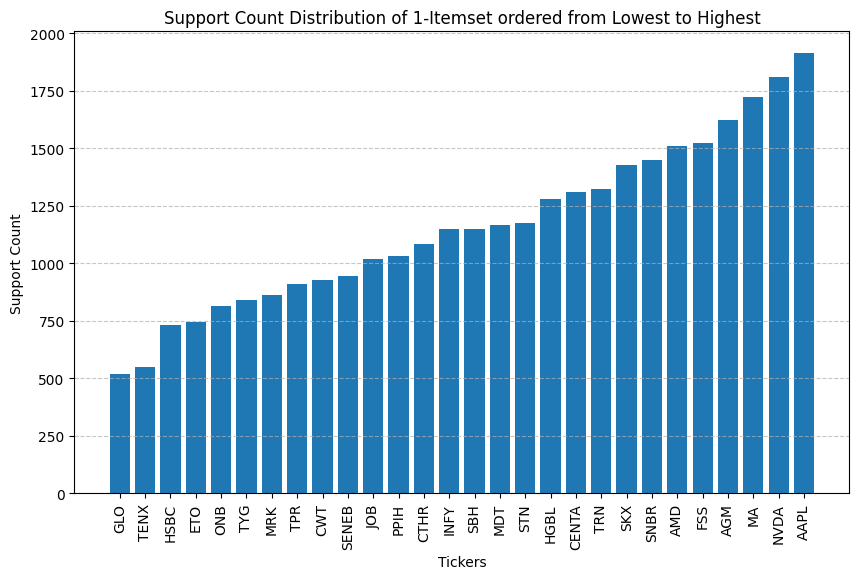

Top 10% Percentile Items:
NVDA: 1810
AAPL: 1912


In [15]:
ds_medium = get_dataset(TICKERS_MEDIUM)
dataset_medium = clean_data(ds_medium)
transactions_medium = get_transactions_table(dataset_medium, DATA_INTERVAL, TREND_THRESHOLD)

# Added this condition to fix Index error caused by mismatch of tickers as the ticker 'TRTN' data is not downloaded by get_dataset method
common_tickers = [ticker for ticker in TICKERS_MEDIUM if ticker in transactions_medium.columns]
generate_histogram(common_tickers, transactions_medium)
calculate_top_percentile(10, common_tickers, transactions_medium)

# 4. Frequent Itemsets

## 4.1 Apriori unoptimized
Create and clearly document a function that calculates frequent itemsets using the "Apriori" algorithm without any optimization. The function, `apriori_unoptimized(minsup, transactions)` will take as inputs the transactions generated by function `get_transactions` and a minsup floating point value between 0 and 1, and generate a list of frequent items with basic statistics, as follows:

Found 27 1-frequent itemsets: { AMD }, { APPL }, { WST }, ... { FSC }

Found 345 2-frequent itemsets: { GLO, CWT }, { JOB, TYG }, ... { ELLO, NRG }

...

Found N M-frequent itemsets: ...


In [16]:
def apriori_unoptimized(minsup, transactions):
    '''Finds frequent itemsets in transactions using the unoptimized Apriori algorithm.

    Args:
        minsup (float): The minimum support threshold.
        transactions (DataFrame): The transactions database.

    Returns:
        frequent_itemsets (list): List of sets of frequent itemsets.
    '''
    # Get the list of items   present in the transactions
    items = transactions.columns

    # Initialize k, the size of the itemsets to be considered
    k = 1

    # Initialize the list to store all the frequent itemsets
    frequent_itemsets = []

    # Calculate the support for individual items and initialize Fk with frequent 1-itemsets
    Fk = [{item} for item in items if calculate_support(transactions, (item,)) >= minsup]

    # Repeat until no more frequent k-itemsets are found
    while Fk:
        print(f"Found {len(Fk)} {k}-frequent itemsets:", Fk)
        frequent_itemsets.extend(Fk)
        Ck_plus_1 = set()
        # Generate (k+1)-itemset candidates by joining pairs of frequent k-itemsets
        for i in range(len(Fk)):
            for j in range(i + 1, len(Fk)):
                candidate = Fk[i].union(Fk[j])
                if len(candidate) == k + 1:
                    Ck_plus_1.add(tuple(sorted(candidate)))

        # Filter the candidates to keep only those with support >= minsup
        Fk_plus_1 = [set(item) for item in Ck_plus_1 if calculate_support(transactions, item) >= minsup]
        Fk = Fk_plus_1
        k += 1

    # Return the list of all found frequent itemsets
    return frequent_itemsets


## 4.2 Apriori Optimized
Create and clearly document a function that calculates frequent itemsets using the "Apriori" algorithm with optimization. The function, `apriori_optimized(minsup, transactions)` will take as inputs the transactions generated by function "get_transactions" and a minsup floating point value between 0 and 1, and generate a list of frequent items with basic statistics the same as "apriori_exhaustive". This function, however, must include at least one optimization from the list provided in the course slides

In [17]:
def apriori_optimized(minsup, transactions):
    '''Function to find frequent itemsets in transactions using the Apriori algorithm with hash-based candidate generation.

    Args:
        minsup (float): The minimum support threshold.
        transactions (DataFrame): The transactions database.

    Returns:
        frequent_itemsets (list): List of sets of frequent itemsets.
    '''
    #Added for optimization
    def calculate_support(transactions, itemset):
          """Compute the support of an itemset within transactions."""
          mask = transactions[list(itemset)].all(axis=1)
          return mask.sum() / len(transactions)

    def hash_function(itemset):
        """Generate a hash value for a given itemset."""
        return hash(frozenset(itemset))

    items = transactions.columns
    k = 1
    current_frequent_itemsets = [
        {item} for item in items if calculate_support(transactions, {item}) >= minsup
    ]
    all_frequent_itemsets = []

    while current_frequent_itemsets:
        print(f"Found {len(current_frequent_itemsets)} {k}-frequent itemsets:", current_frequent_itemsets)
        all_frequent_itemsets.extend(current_frequent_itemsets)
        next_candidates = set()
        hash_table = {}

        # Generate candidates and populate the hash table for quick lookups
        for i in range(len(current_frequent_itemsets)):
            for j in range(i + 1, len(current_frequent_itemsets)):
                itemset1 = list(sorted(current_frequent_itemsets[i]))
                itemset2 = list(sorted(current_frequent_itemsets[j]))

                # Check if the first k-2 items of both itemsets are identical
                if k == 1 or itemset1[:-1] == itemset2[:-1]:
                    merged = tuple(sorted(set(itemset1 + itemset2)))
                    if len(merged) == k + 1 and merged not in hash_table:
                        hash_table[merged] = hash_function(merged)
                        next_candidates.add(merged)

        # Calculate the exact support for each candidate
        next_frequent_itemsets = []
        for item in next_candidates:
            support = calculate_support(transactions, item)
            if support >= minsup:
                next_frequent_itemsets.append(set(item))

        current_frequent_itemsets = next_frequent_itemsets
        k += 1

    return all_frequent_itemsets


## 4.3 Runtime
Calculate the time it takes to run the `apriori_unoptimized` and `apriori_optimized` functions using the "TICKERS_MEDIUM" tickers list. Compare runtimes.

In [18]:
# Prepare data - MEDIUM
ds_medium = get_dataset(TICKERS_MEDIUM)
dataset_medium = clean_data(ds_medium)
transactions_medium = get_transactions_table(dataset_medium, DATA_INTERVAL, TREND_THRESHOLD)

# Minimum Support
MINSUP = 0.2

[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: AMD with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: AAPL with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: MA with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: MRK with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: NVDA with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: PPIH with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: GLO with (3272, 6) entries
[*********************100%%**********************]  1 of 1 completed
Downloaded data for ticker: AGM with (3272, 6) entries
[*****

In [19]:
# Run unoptimized

%time frequent_itemsets_medium = apriori_unoptimized(MINSUP, transactions_medium)
print("Frequent Itemsets un-optimized apriori function: ", frequent_itemsets_medium)


Found 26 1-frequent itemsets: [{'AMD'}, {'AAPL'}, {'MA'}, {'MRK'}, {'NVDA'}, {'PPIH'}, {'AGM'}, {'HGBL'}, {'ETO'}, {'INFY'}, {'SNBR'}, {'CENTA'}, {'CWT'}, {'SKX'}, {'FSS'}, {'TPR'}, {'ONB'}, {'SBH'}, {'MDT'}, {'SENEB'}, {'HSBC'}, {'STN'}, {'JOB'}, {'TYG'}, {'TRN'}, {'CTHR'}]
Found 89 2-frequent itemsets: [{'SBH', 'AGM'}, {'FSS', 'AMD'}, {'AMD', 'CENTA'}, {'MA', 'SKX'}, {'STN', 'SKX'}, {'AMD', 'MDT'}, {'AGM', 'MA'}, {'NVDA', 'SKX'}, {'FSS', 'SKX'}, {'SNBR', 'CENTA'}, {'SNBR', 'MA'}, {'AGM', 'AMD'}, {'NVDA', 'SNBR'}, {'FSS', 'SNBR'}, {'SNBR', 'TRN'}, {'HGBL', 'AGM'}, {'AGM', 'NVDA'}, {'MA', 'AMD'}, {'FSS', 'CENTA'}, {'STN', 'MA'}, {'STN', 'NVDA'}, {'CTHR', 'SKX'}, {'MA', 'MDT'}, {'FSS', 'STN'}, {'AMD', 'TRN'}, {'SNBR', 'TPR'}, {'NVDA', 'MDT'}, {'FSS', 'MDT'}, {'TRN', 'SKX'}, {'SNBR', 'CTHR'}, {'AAPL', 'NVDA'}, {'STN', 'TRN'}, {'HGBL', 'AMD'}, {'SBH', 'MA'}, {'INFY', 'MA'}, {'SKX', 'CENTA'}, {'NVDA', 'CWT'}, {'FSS', 'CTHR'}, {'AAPL', 'MDT'}, {'TRN', 'CENTA'}, {'MA', 'TRN'}, {'FSS', 'INFY'

In [20]:
# Run optimized

%time frequent_itemsets_medium = apriori_optimized(MINSUP, transactions_medium)
print("Frequent Itemsets optimized apriori function: ", frequent_itemsets_medium)


Found 26 1-frequent itemsets: [{'AMD'}, {'AAPL'}, {'MA'}, {'MRK'}, {'NVDA'}, {'PPIH'}, {'AGM'}, {'HGBL'}, {'ETO'}, {'INFY'}, {'SNBR'}, {'CENTA'}, {'CWT'}, {'SKX'}, {'FSS'}, {'TPR'}, {'ONB'}, {'SBH'}, {'MDT'}, {'SENEB'}, {'HSBC'}, {'STN'}, {'JOB'}, {'TYG'}, {'TRN'}, {'CTHR'}]
Found 89 2-frequent itemsets: [{'SBH', 'AGM'}, {'FSS', 'AMD'}, {'AMD', 'CENTA'}, {'MA', 'SKX'}, {'STN', 'SKX'}, {'AMD', 'MDT'}, {'AGM', 'MA'}, {'NVDA', 'SKX'}, {'FSS', 'SKX'}, {'SNBR', 'CENTA'}, {'SNBR', 'MA'}, {'AGM', 'AMD'}, {'NVDA', 'SNBR'}, {'FSS', 'SNBR'}, {'SNBR', 'TRN'}, {'HGBL', 'AGM'}, {'AGM', 'NVDA'}, {'MA', 'AMD'}, {'FSS', 'CENTA'}, {'STN', 'MA'}, {'STN', 'NVDA'}, {'CTHR', 'SKX'}, {'MA', 'MDT'}, {'FSS', 'STN'}, {'AMD', 'TRN'}, {'SNBR', 'TPR'}, {'NVDA', 'MDT'}, {'FSS', 'MDT'}, {'TRN', 'SKX'}, {'SNBR', 'CTHR'}, {'AAPL', 'NVDA'}, {'STN', 'TRN'}, {'HGBL', 'AMD'}, {'SBH', 'MA'}, {'INFY', 'MA'}, {'SKX', 'CENTA'}, {'NVDA', 'CWT'}, {'FSS', 'CTHR'}, {'AAPL', 'MDT'}, {'TRN', 'CENTA'}, {'MA', 'TRN'}, {'FSS', 'INFY'

From the above run time comparison, we can see that optimized apriori function using hash technique for pruning candidate is faster when compared to unoptimized apriori function.

## 4.4 Rules
Create and clearly document a function that calculates rules. The function, `get_rules(transactions, frequent_itemsets, lift, interest)`, will generate a set of rules based on the frequent_itemsets, the minimum lift (a floating point value between 0 and 1) and minimum interest (a floating point value between 0 and infinite). The function will return the rules with some basic information, as follows:

Found 123 rules with 2 items: { AMD } > { FSC }, ...

...

Found N rules with M items: { GLO, ... } > { ELLO, ... }

In [21]:
def get_rules(transactions, frequent_itemsets, lift, confidence):
    '''Generates association rules from frequent itemsets.

    Args:
        transactions (DataFrame): The transactions database.
        frequent_itemsets (list): List of sets of frequent itemsets.
        lift (float): The minimum lift value for a rule to be considered significant.
        confidence (float): The minimum confidence value for a rule to be considered.

    Returns:
        list: A list of association rules.
    '''

    def calculate_support(itemset, df):
        return sum(df[list(itemset)].all(axis=1)) / len(df)

    rules = []

    for itemset in frequent_itemsets:
        for i in range(1, len(itemset)):
            for antecedent in [frozenset(x) for x in combinations(itemset, i)]:
                consequent = itemset - antecedent
                if consequent:
                    antecedent_support = calculate_support(antecedent, transactions)
                    consequent_support = calculate_support(consequent, transactions)
                    rule_support = calculate_support(antecedent | consequent, transactions)

                    # Confidence: P(Y|X) = P(X, Y) / P(X)
                    confidence = rule_support / antecedent_support

                    # Lift: P(Y|X) / P(Y) = (P(X, Y) / P(X)) / P(Y)
                    lift = confidence / consequent_support

                    if lift >= lift and confidence >= confidence:
                        rules.append((antecedent, consequent))

    rules.sort(key=lambda x: len(x[0] | x[1]))

    formatted_rules = format_rules_by_length(rules)

    for rule_str in formatted_rules:
        print(rule_str)

    return rules

def format_rules_by_length(rules):
    grouped_rules = {}
    for rule in rules:
        rule_len = len(rule[0] | rule[1])
        if rule_len not in grouped_rules:
            grouped_rules[rule_len] = []
        grouped_rules[rule_len].append(rule)

    formatted_rules = []
    for key, group in grouped_rules.items():
        rule_strings = [f"{{{', '.join(ant)}}} > {{{', '.join(con)}}}" for ant, con in group]
        formatted_rules.append(f"Found {len(group)} rules with {key} items: {', '.join(rule_strings)} ...")

    return formatted_rules


In [22]:
# Rules with Confidence >= 30%, and Lift >= 0.8
rules = get_rules( transactions_medium, frequent_itemsets_medium, 0.8, 0.3)

Found 178 rules with 2 items: {SBH} > {AGM}, {AGM} > {SBH}, {FSS} > {AMD}, {AMD} > {FSS}, {AMD} > {CENTA}, {CENTA} > {AMD}, {MA} > {SKX}, {SKX} > {MA}, {STN} > {SKX}, {SKX} > {STN}, {AMD} > {MDT}, {MDT} > {AMD}, {AGM} > {MA}, {MA} > {AGM}, {NVDA} > {SKX}, {SKX} > {NVDA}, {FSS} > {SKX}, {SKX} > {FSS}, {SNBR} > {CENTA}, {CENTA} > {SNBR}, {SNBR} > {MA}, {MA} > {SNBR}, {AGM} > {AMD}, {AMD} > {AGM}, {NVDA} > {SNBR}, {SNBR} > {NVDA}, {FSS} > {SNBR}, {SNBR} > {FSS}, {SNBR} > {TRN}, {TRN} > {SNBR}, {HGBL} > {AGM}, {AGM} > {HGBL}, {AGM} > {NVDA}, {NVDA} > {AGM}, {MA} > {AMD}, {AMD} > {MA}, {FSS} > {CENTA}, {CENTA} > {FSS}, {STN} > {MA}, {MA} > {STN}, {STN} > {NVDA}, {NVDA} > {STN}, {CTHR} > {SKX}, {SKX} > {CTHR}, {MA} > {MDT}, {MDT} > {MA}, {FSS} > {STN}, {STN} > {FSS}, {AMD} > {TRN}, {TRN} > {AMD}, {SNBR} > {TPR}, {TPR} > {SNBR}, {NVDA} > {MDT}, {MDT} > {NVDA}, {FSS} > {MDT}, {MDT} > {FSS}, {TRN} > {SKX}, {SKX} > {TRN}, {SNBR} > {CTHR}, {CTHR} > {SNBR}, {AAPL} > {NVDA}, {NVDA} > {AAPL}, {STN} 